In [1]:
from statsmodels.stats.descriptivestats import describe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
large = 22
med = 16
small = 12
params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":80,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

In [3]:
pd.set_option('display.precision', 2)
# pd.reset_option('display.precision') # 还原精度设置

In [4]:
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df1 = pd.read_excel('1.2铅钡.xlsx')
data1 = df1.iloc[:, 4:]

X = data1.iloc[:,1:]
y = df1.iloc[:,3]

data1.describe()

# 风化铅钡
X1 = data1.iloc[(y>0).values]
X1.describe()

# 未风化铅钡
X2 = data1.iloc[(y==0).values]
X2.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),总含量
count,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00
mean,54.66,1.68,0.22,1.32,0.64,4.46,0.74,1.43,22.08,9.00,1.05,0.27,0.05,0.16,97.76
std,11.83,2.37,0.31,1.28,0.55,3.26,1.15,1.97,8.22,5.83,1.85,0.24,0.13,0.76,2.30
min,31.94,0.00,0.00,0.00,0.00,1.42,0.00,0.00,9.30,2.03,0.00,0.00,0.00,0.00,88.41
25%,49.81,0.00,0.00,0.48,0.00,2.35,0.00,0.43,16.36,5.05,0.04,0.06,0.00,0.00,97.16
50%,54.61,0.00,0.15,0.84,0.71,3.86,0.00,0.65,20.12,8.99,0.19,0.26,0.00,0.00,98.25
75%,63.48,2.88,0.28,1.84,1.04,5.22,1.14,1.90,27.27,10.41,1.23,0.34,0.00,0.00,98.70
max,75.51,7.92,1.41,4.49,1.67,14.34,4.59,8.46,39.22,26.23,6.34,0.91,0.44,3.66,99.98


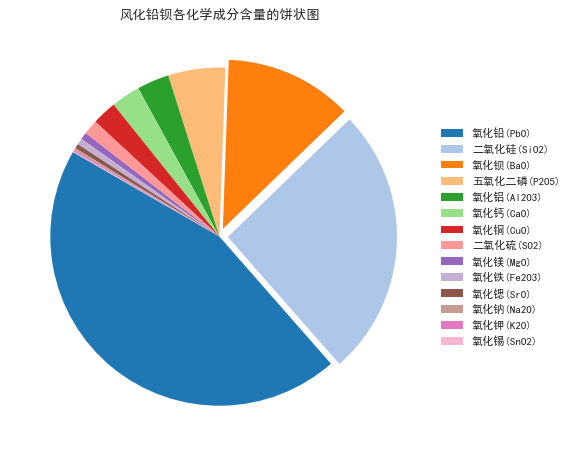

In [14]:
def plot_pie(data, explode, title, clr=plt.cm.tab20.colors):
    # 绘制图像
    fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
    wedges, texts, autotexts = ax.pie(
        x=data,
        autopct="",
        colors=clr,  # 图形的颜色
        startangle=150,  # 第一瓣扇叶从什么角度开始，与水平线的夹角
        explode=explode,  # 扇叶与扇叶之间的距离
    )
    # 装饰图像
    categories = data.index
    ax.legend(
        categories,  # 输入数据
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    ax.set_title(title)
    plt.setp(
        autotexts, size=12, weight=700, color="w"
    )  # 设置某个对象(Artist)的属性(Property)， weight表示加粗
    plt.savefig('./1.2饼状图/' + title +'.svg', bbox_inches='tight')
    plt.show()

dt = X1.mean()[:-1]
dt.sort_values(ascending=False, inplace=True)
explode = [0, 0.05, 0.05, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0]  # 用于准备突出去强调的图，表示扇叶与扇叶之间的距离
title = "风化铅钡各化学成分含量的饼状图"


plot_pie(dt, explode, title, )

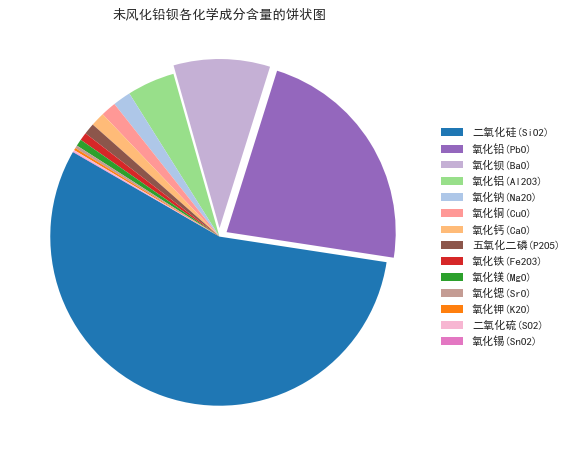

In [15]:
clr_df = plt.cm.tab20.colors
clr = [clr_df[i % len(clr_df)] for i in range(dt.shape[0])]

dt2 = pd.DataFrame([X2.columns[:-1], clr, X2.mean()[:-1]]).T

dt2.sort_values(by=2, ascending=False, inplace=True)
dt2.index = dt2[0]

plot_pie(dt2[2], explode, '未风化铅钡各化学成分含量的饼状图', clr=dt2[1])

In [16]:
df2 = pd.read_excel('1.2高钾.xlsx')
data2 = df2.iloc[:, 4:]

X = data2.iloc[:,1:]
y = df2.iloc[:,3]

In [17]:
# 风化高钾
X3 = data2.iloc[(y>0).values]
X3.describe()

# 未风化高钾
X4 = data2.iloc[(y==0).values]
X4.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),总含量
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,67.98,0.69,9.33,5.33,1.08,6.62,1.93,2.45,0.41,0.60,1.40,0.04,0.20,0.10,98.18
std,8.76,1.29,3.92,3.09,0.68,2.49,1.67,1.66,0.59,0.98,1.43,0.05,0.68,0.19,1.13
min,59.01,0.00,0.00,0.00,0.00,3.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,96.06
25%,61.68,0.00,7.60,4.04,0.62,5.14,0.48,1.00,0.00,0.00,0.69,0.00,0.00,0.00,97.52
50%,65.53,0.00,9.83,6.10,1.17,6.19,2.11,2.34,0.15,0.00,1.02,0.02,0.00,0.00,98.46
75%,71.17,0.53,12.30,7.57,1.60,7.93,2.45,3.43,0.51,1.07,1.29,0.08,0.00,0.09,98.89
max,87.05,3.38,14.52,8.70,1.98,11.15,6.04,5.09,1.62,2.86,4.50,0.12,2.36,0.47,100.00


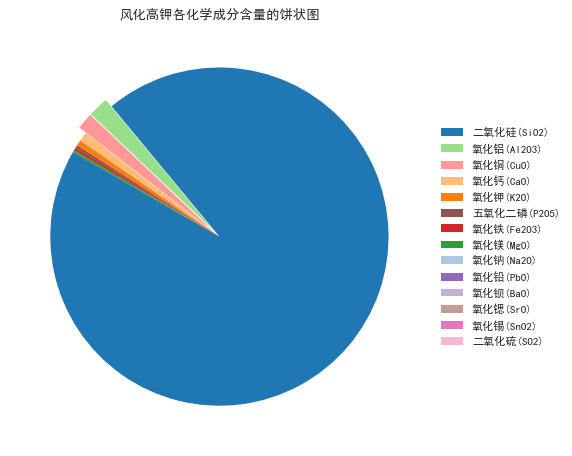

In [18]:
explode = [0, 0.05, 0.05, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0]  # 用于准备突出去强调的图，表示扇叶与扇叶之间的距离
title = "风化高钾各化学成分含量的饼状图"

clr_df = plt.cm.tab20.colors
clr = [clr_df[i % len(clr_df)] for i in range(dt.shape[0])]

dt2 = pd.DataFrame([X3.columns[:-1], clr, X3.mean()[:-1]]).T

dt2.sort_values(by=2, ascending=False, inplace=True)
dt2.index = dt2[0]

plot_pie(dt2[2], explode, title, clr=dt2[1])

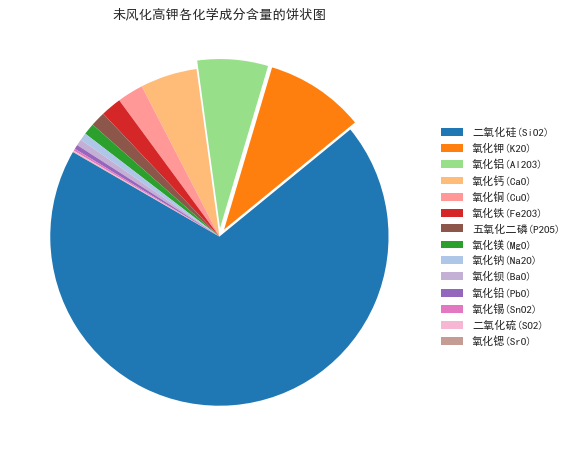

In [19]:
explode = [0, 0.05, 0.05, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0]  # 用于准备突出去强调的图，表示扇叶与扇叶之间的距离
title = "未风化高钾各化学成分含量的饼状图"

clr_df = plt.cm.tab20.colors
clr = [clr_df[i % len(clr_df)] for i in range(dt.shape[0])]

dt2 = pd.DataFrame([X4.columns[:-1], clr, X4.mean()[:-1]]).T

dt2.sort_values(by=2, ascending=False, inplace=True)
dt2.index = dt2[0]

plot_pie(dt2[2], explode, title, clr=dt2[1])